In [1]:
import pandas as pd
import numpy as np

%matplotlib inline 
import matplotlib.pyplot as plt   


#importing seaborn for statistical plots
import seaborn as sns

import ipywidgets as widgets


In [2]:
# To read the csv file in folder path
df=pd.read_csv("E:\GLC\dataset\ecommerce_data.csv")

In [3]:
# It used gives top 5 rows 
df.head()

,order_id,product_id,product_category,quantity,price_dollars,customer_id,order_date,country,state,sales_hour,discount_percent,return_status,sales_value,website_traffic,order_number,lifetime_value
0,1,1439,Books,1,160,10510,1/1/2022 0:00,USA,California,0,9,Not Returned,145.60,280,1,145.60
1,2,4268,Home & Kitchen,5,198,25456,1/1/2022 1:00,India,Maharashtra,1,10,Returned,891.00,909,1,891.00
2,3,1627,Electronics,2,58,23047,1/1/2022 2:00,India,Maharashtra,2,3,Returned,112.52,626,1,112.52
3,4,4463,Electronics,7,185,21280,1/1/2022 3:00,UK,England,3,19,Not Returned,1048.95,282,1,2352.75
4,5,4103,Books,5,30,16379,1/1/2022 4:00,Australia,New South Wales,4,4,Returned,144.00,606,1,144.00


In [4]:
# It's describes about data(data types,null values...)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          5000 non-null   int64  
 1   product_id        5000 non-null   int64  
 2   product_category  5000 non-null   object 
 3   quantity          5000 non-null   int64  
 4   price_dollars     5000 non-null   int64  
 5   customer_id       5000 non-null   int64  
 6   order_date        5000 non-null   object 
 7   country           5000 non-null   object 
 8   state             5000 non-null   object 
 9   sales_hour        5000 non-null   int64  
 10  discount_percent  5000 non-null   int64  
 11  return_status     5000 non-null   object 
 12  sales_value       5000 non-null   float64
 13  website_traffic   5000 non-null   int64  
 14  order_number      5000 non-null   int64  
 15  lifetime_value    5000 non-null   float64
dtypes: float64(2), int64(9), object(5)
memory 

In [5]:
# It's shows the no.of rows & no.of Cloumns
df.shape

(5000, 16)

In [6]:
# its describes the descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,5000.0,2500.500000,1443.520003,1.00,1250.750,2500.500,3750.2500,5000.00
product_id,5000.0,3011.978000,1143.730878,1000.00,2028.750,3045.500,3993.0000,4998.00
quantity,5000.0,5.455400,2.855248,1.00,3.000,5.000,8.0000,10.00
price_dollars,5000.0,105.607000,54.968850,10.00,58.750,105.000,154.0000,200.00
customer_id,5000.0,19952.715400,5785.725497,10000.00,14860.750,20005.500,24900.5000,29997.00
sales_hour,5000.0,11.487200,6.925332,0.00,5.000,11.000,17.0000,23.00
discount_percent,5000.0,9.979000,5.790481,0.00,5.000,10.000,15.0000,20.00
sales_value,5000.0,519.559952,412.552028,9.02,174.600,408.265,755.5275,1950.30
website_traffic,5000.0,555.719000,261.572883,100.00,325.750,562.000,786.0000,1000.00
order_number,5000.0,1.127400,0.363862,1.00,1.000,1.000,1.0000,4.00


# Data Cleaning

In [7]:
# it show the null values in each columns
df.isnull().sum()

order_id            0
product_id          0
product_category    0
quantity            0
price_dollars       0
customer_id         0
order_date          0
country             0
state               0
sales_hour          0
discount_percent    0
return_status       0
sales_value         0
website_traffic     0
order_number        0
lifetime_value      0
dtype: int64

In [8]:
# it shows each column name
df.columns

Index(['order_id', 'product_id', 'product_category', 'quantity',
       'price_dollars', 'customer_id', 'order_date', 'country', 'state',
       'sales_hour', 'discount_percent', 'return_status', 'sales_value',
       'website_traffic', 'order_number', 'lifetime_value'],
      dtype='object')

In [9]:
# it shows each country count in country column how many times its appear?
df['country'].value_counts()

Canada       1045
India        1008
Australia    1003
UK           1002
USA           942
Name: country, dtype: int64

In [10]:
df['product_category'].value_counts()

Books             1036
Home & Kitchen    1033
Grocery           1006
Clothing           973
Electronics        952
Name: product_category, dtype: int64

In [11]:
# it show the unique values in particular column
df['product_category'].unique()

array(['Books', 'Home & Kitchen', 'Electronics', 'Clothing', 'Grocery'],
      dtype=object)

In [12]:
# it shows the  total no of unique values in a particular column
df['product_category'].nunique()

5

In [13]:
# it shows duplicates value in dataset
df[df.duplicated()]
# or
df.duplicated().unique()

array([False])

In [14]:
df.columns


Index(['order_id', 'product_id', 'product_category', 'quantity',
       'price_dollars', 'customer_id', 'order_date', 'country', 'state',
       'sales_hour', 'discount_percent', 'return_status', 'sales_value',
       'website_traffic', 'order_number', 'lifetime_value'],
      dtype='object')

In [15]:
df.head(1)

,order_id,product_id,product_category,quantity,price_dollars,customer_id,order_date,country,state,sales_hour,discount_percent,return_status,sales_value,website_traffic,order_number,lifetime_value
0,1,1439,Books,1,160,10510,1/1/2022 0:00,USA,California,0,9,Not Returned,145.6,280,1,145.6


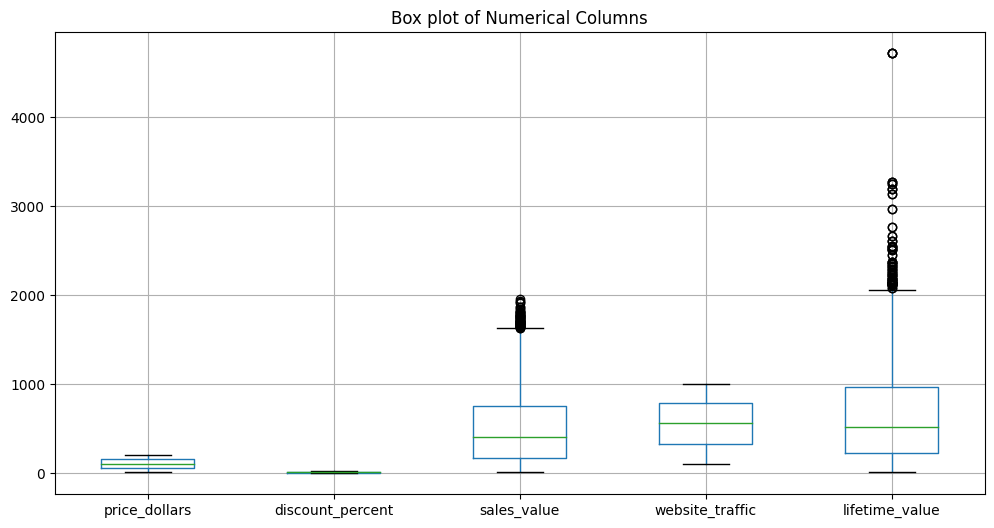

In [16]:
# Check for outliers
# Visualize box plots for numerical columns
plt.figure(figsize=(12,6))
df.boxplot(column=['price_dollars', 'discount_percent', 'sales_value', 'website_traffic','lifetime_value'])
plt.title('Box plot of Numerical Columns')
plt.show()

In [17]:
#Handling outliers
# Remove outliers based on a specific threshold
df_cleaned = df[(df['sales_value'] < 1500) & (df['lifetime_value'] < 1850)]

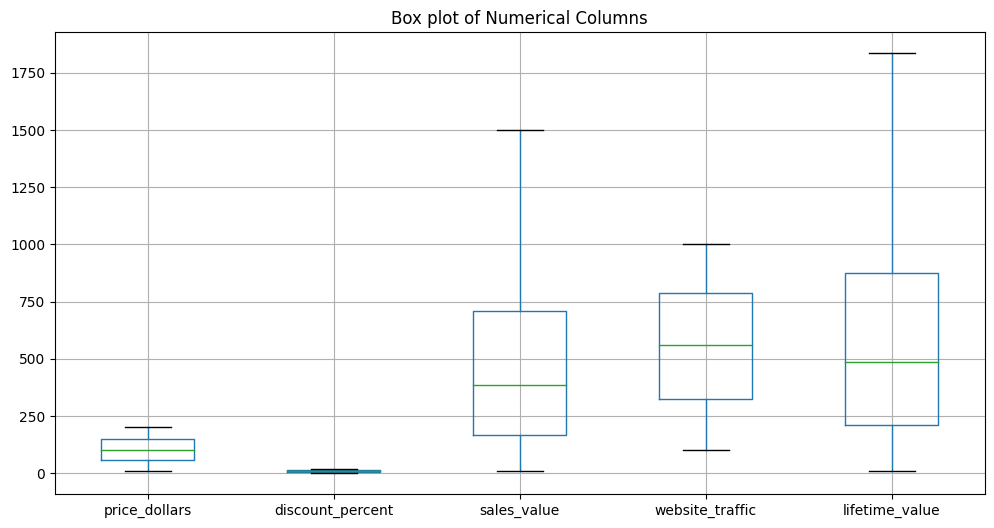

In [18]:
plt.figure(figsize=(12,6))
df_cleaned.boxplot(column=['price_dollars', 'discount_percent', 'sales_value', 'website_traffic','lifetime_value'])
plt.title('Box plot of Numerical Columns')
plt.show()

In [19]:
df_cleaned.shape

(4747, 16)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          5000 non-null   int64  
 1   product_id        5000 non-null   int64  
 2   product_category  5000 non-null   object 
 3   quantity          5000 non-null   int64  
 4   price_dollars     5000 non-null   int64  
 5   customer_id       5000 non-null   int64  
 6   order_date        5000 non-null   object 
 7   country           5000 non-null   object 
 8   state             5000 non-null   object 
 9   sales_hour        5000 non-null   int64  
 10  discount_percent  5000 non-null   int64  
 11  return_status     5000 non-null   object 
 12  sales_value       5000 non-null   float64
 13  website_traffic   5000 non-null   int64  
 14  order_number      5000 non-null   int64  
 15  lifetime_value    5000 non-null   float64
dtypes: float64(2), int64(9), object(5)
memory 

# It's display the country/state wise Sales

In [21]:
c=widgets.Dropdown(
    options=['country', 'state'],
    value='country',
    description='select  region:',
    disabled=False,
)

def graph(a):
    plt.figure(figsize=(12,6))
    sns.barplot(x=a,y='sales_value', data=df_cleaned)

In [22]:
widgets.interact(graph,a=c)

interactive(children=(Dropdown(description='select  region:', options=('country', 'state'), value='country'), …

<function __main__.graph(a)>

# It's display country/state wise each product category sales

In [23]:
con2 = widgets.Dropdown(
    options=['country', 'state'],
    value='country',
    description='Select region:',
    disabled=False,
)

def plotting(x_value):
  con3 = widgets.Dropdown(
    options=df_cleaned['product_category'].unique(),
    value='Books',
    description='product_category :',
    disabled=False,
  )
  
  def mainplot(y_value):
    cat = df_cleaned[df_cleaned['product_category']==y_value]
    plt.title(y_value)
    #plt.figure(figsize=(8,4))
    sns.barplot(x=x_value, y='sales_value', data=cat)
  widgets.interact(mainplot,y_value = con3)

In [24]:
widgets.interact(plotting,x_value = con2)

interactive(children=(Dropdown(description='Select region:', options=('country', 'state'), value='country'), O…

<function __main__.plotting(x_value)>

In [25]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4747 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          4747 non-null   int64  
 1   product_id        4747 non-null   int64  
 2   product_category  4747 non-null   object 
 3   quantity          4747 non-null   int64  
 4   price_dollars     4747 non-null   int64  
 5   customer_id       4747 non-null   int64  
 6   order_date        4747 non-null   object 
 7   country           4747 non-null   object 
 8   state             4747 non-null   object 
 9   sales_hour        4747 non-null   int64  
 10  discount_percent  4747 non-null   int64  
 11  return_status     4747 non-null   object 
 12  sales_value       4747 non-null   float64
 13  website_traffic   4747 non-null   int64  
 14  order_number      4747 non-null   int64  
 15  lifetime_value    4747 non-null   float64
dtypes: float64(2), int64(9), object(5)
memory 

In [26]:
#It object datatype to datetime datatype
df_cleaned['order_date'] = pd.to_datetime(df_cleaned['order_date'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_8044\42311417.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['order_date'] = pd.to_datetime(df_cleaned['order_date'])


In [27]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4747 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          4747 non-null   int64         
 1   product_id        4747 non-null   int64         
 2   product_category  4747 non-null   object        
 3   quantity          4747 non-null   int64         
 4   price_dollars     4747 non-null   int64         
 5   customer_id       4747 non-null   int64         
 6   order_date        4747 non-null   datetime64[ns]
 7   country           4747 non-null   object        
 8   state             4747 non-null   object        
 9   sales_hour        4747 non-null   int64         
 10  discount_percent  4747 non-null   int64         
 11  return_status     4747 non-null   object        
 12  sales_value       4747 non-null   float64       
 13  website_traffic   4747 non-null   int64         
 14  order_number      4747 n

In [28]:
# it's extract year form orderdate
df_cleaned['year']=df_cleaned['order_date'].dt.year

C:\Users\Admin\AppData\Local\Temp\ipykernel_8044\1972518710.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['year']=df_cleaned['order_date'].dt.year


In [29]:
#it's extract month from orderdate
df_cleaned['month']=df_cleaned['order_date'].dt.month_name()

C:\Users\Admin\AppData\Local\Temp\ipykernel_8044\3865666315.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['month']=df_cleaned['order_date'].dt.month_name()


In [30]:
df_cleaned['month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July'],
      dtype=object)

In [31]:
#it drop the unnecesseary column year, beacause it shows only one  year  2022 in dataset
df_cleaned.drop('year',axis=1,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8044\3065051530.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop('year',axis=1,inplace=True)


In [32]:
df_cleaned

,order_id,product_id,product_category,quantity,price_dollars,customer_id,order_date,country,state,sales_hour,discount_percent,return_status,sales_value,website_traffic,order_number,lifetime_value,month
0,1,1439,Books,1,160,10510,2022-01-01 00:00:00,USA,California,0,9,Not Returned,145.60,280,1,145.60,January
1,2,4268,Home & Kitchen,5,198,25456,2022-01-01 01:00:00,India,Maharashtra,1,10,Returned,891.00,909,1,891.00,January
2,3,1627,Electronics,2,58,23047,2022-01-01 02:00:00,India,Maharashtra,2,3,Returned,112.52,626,1,112.52,January
4,5,4103,Books,5,30,16379,2022-01-01 04:00:00,Australia,New South Wales,4,4,Returned,144.00,606,1,144.00,January
5,6,3461,Books,2,106,13650,2022-01-01 05:00:00,Canada,Ontario,5,8,Returned,195.04,540,1,195.04,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,1032,Grocery,10,86,28755,2022-07-28 03:00:00,Australia,New South Wales,3,13,Returned,748.20,180,1,748.20,July
4996,4997,1205,Books,5,79,12949,2022-07-28 04:00:00,Canada,Ontario,4,11,Returned,351.55,971,1,351.55,July
4997,4998,3071,Grocery,7,169,25680,2022-07-28 05:00:00,Canada,Ontario,5,9,Returned,1076.53,458,1,1076.53,July
4998,4999,2360,Clothing,1,196,14721,2022-07-28 06:00:00,UK,England,6,9,Not Returned,178.36,884,1,178.36,July


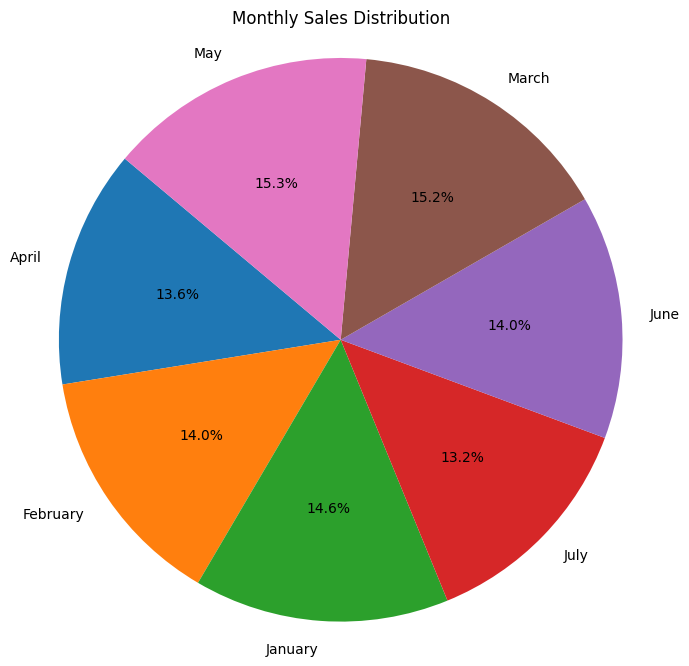

In [33]:
# Group by 'Month' and calculate the total sales for each month
monthly_sales = df_cleaned.groupby('month')['sales_value'].sum()


plt.figure(figsize=(8, 8))
plt.pie(monthly_sales, labels=monthly_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Monthly Sales Distribution')

plt.axis('equal')  
plt.show()

In [34]:
df_cleaned['Quarter'] = df_cleaned['order_date'].dt.to_period('Q')

C:\Users\Admin\AppData\Local\Temp\ipykernel_8044\1389338155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Quarter'] = df_cleaned['order_date'].dt.to_period('Q')


In [35]:
df_cleaned

,order_id,product_id,product_category,quantity,price_dollars,customer_id,order_date,country,state,sales_hour,discount_percent,return_status,sales_value,website_traffic,order_number,lifetime_value,month,Quarter
0,1,1439,Books,1,160,10510,2022-01-01 00:00:00,USA,California,0,9,Not Returned,145.60,280,1,145.60,January,2022Q1
1,2,4268,Home & Kitchen,5,198,25456,2022-01-01 01:00:00,India,Maharashtra,1,10,Returned,891.00,909,1,891.00,January,2022Q1
2,3,1627,Electronics,2,58,23047,2022-01-01 02:00:00,India,Maharashtra,2,3,Returned,112.52,626,1,112.52,January,2022Q1
4,5,4103,Books,5,30,16379,2022-01-01 04:00:00,Australia,New South Wales,4,4,Returned,144.00,606,1,144.00,January,2022Q1
5,6,3461,Books,2,106,13650,2022-01-01 05:00:00,Canada,Ontario,5,8,Returned,195.04,540,1,195.04,January,2022Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,1032,Grocery,10,86,28755,2022-07-28 03:00:00,Australia,New South Wales,3,13,Returned,748.20,180,1,748.20,July,2022Q3
4996,4997,1205,Books,5,79,12949,2022-07-28 04:00:00,Canada,Ontario,4,11,Returned,351.55,971,1,351.55,July,2022Q3
4997,4998,3071,Grocery,7,169,25680,2022-07-28 05:00:00,Canada,Ontario,5,9,Returned,1076.53,458,1,1076.53,July,2022Q3
4998,4999,2360,Clothing,1,196,14721,2022-07-28 06:00:00,UK,England,6,9,Not Returned,178.36,884,1,178.36,July,2022Q3


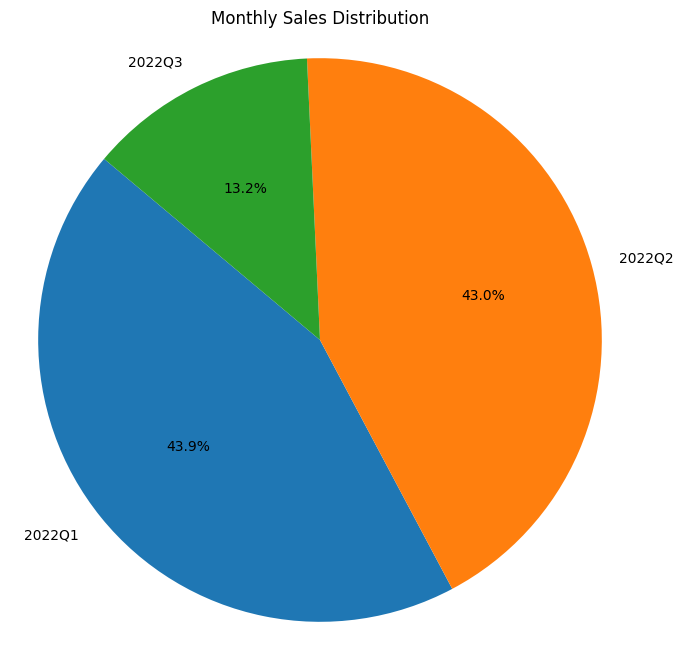

In [36]:
# Group by 'Month' and calculate the total sales for each month
quaterly_sales = df_cleaned.groupby('Quarter')['sales_value'].sum()


plt.figure(figsize=(8, 8))
plt.pie(quaterly_sales, labels=quaterly_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Monthly Sales Distribution')

plt.axis('equal')  
plt.show()